In [1]:
# %pip install pandas numpy re warnings

In [2]:
#%pip install nltk

In [3]:
# 
# %pip install scikit-learn

In [4]:
# %pip install plotly

In [5]:
#%pip install kneed

In [6]:
# 📚 Basic Libraries

import pandas as pd
import numpy as np
import os
import re # Regular Expression
import warnings

# 📝 Text Processing
import nltk
from nltk.stem import WordNetLemmatizer # to lemmatize the words #
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize # sentence tokenizer
from nltk.corpus import wordnet # to get the wordnet pos tags
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.feature_extraction.text import CountVectorizer # to create a bag of words

# Machine Learning
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

# Ensure kneed is installed
from kneed import KneeLocator

***1***. **Load and Inspect the Data**

In [7]:

# Define the folder path
folder_path = './dataset'

# Define file paths
training_file = os.path.join(folder_path, 'training_data.csv')
testing_file = os.path.join(folder_path, 'testing_data.csv')

# Load the CSV files
train_data = pd.read_csv(training_file, sep="\t")
test_data = pd.read_csv(testing_file, sep="\t")

# Inspect the loaded data
print("Training Data:")
print(train_data.head(2))

print("\nTesting Data:")
print(test_data.head(2))


Training Data:
   0  \
0  0   
1  0   

  donald trump sends out embarrassing new year‚s eve message; this is disturbing  
0  drunk bragging trump staffer started russian c...                              
1  sheriff david clarke becomes an internet joke ...                              

Testing Data:
   2 copycat muslim terrorist arrested with assault weapons
0  2  wow! chicago protester caught on camera admits...    
1  2   germany's fdp look to fill schaeuble's big shoes    


In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
#
#folder_path  = "/content/drive/MyDrive/project-3-nlp/dataset/training_data.csv"

In [10]:
data = train_data


In [11]:
# 🔧 Make your functions:
# Save this file as my_functions.py
# Import your functions in your notebook
# from my_functions import *
def clean_data(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]


def map_pos_tag(word):
    """
    Map POS tag to first character lemmatize() accepts.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper() # get the first character of the POS tag
    tag_dict = { # dictionary to map POS tags
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN) # return the value of the key or the default value

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [12]:
df = data.copy()


In [13]:
clean_data(df)

In [14]:
df.head()

,0,donald_trump_sends_out_embarrassing_new_year‚s_eve_message;_this_is_disturbing
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama‚s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...


In [15]:
df.columns = ['classification', 'news'] # classifictaion of the columns
df

,classification,news
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama‚s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...
...,...,...
34146,1,tears in rain as thais gather for late king's ...
34147,1,pyongyang university needs non-u.s. teachers a...
34148,1,philippine president duterte to visit japan ah...
34149,1,japan's abe may have won election\tbut many do...


***2***. **EDA**

In [16]:
df.dtypes

classification     int64
news              object
dtype: object

In [17]:
df_class = df.classification.value_counts()
df_class

classification
0    17571
1    16580
Name: count, dtype: int64

In [88]:
total_count_class = len(df['classification'])

frequency_class = df_class / total_count_class

frequency_class

classification
0    0.514509
1    0.485491
Name: count, dtype: float64

In [19]:
df.isna().sum()

classification    0
news              0
dtype: int64

In [20]:
df['news'].sample(10)

7703     fox news shows real reaction from demoralized ...
23500    new u.s. u.n. envoy warns allies: back us or w...
25138    north carolina republican office painted with ...
13189    why hillary loves the idea of barack obama as ...
5280     father of purple heart-winning muslim soldier ...
4216                             trump terrified of losing
33093    purge of saudi princes\tbusinessmen widens\ttr...
21432    the firing line: ouster of fbi's comey tests n...
162      this 2016 hannity tweet is now like a knife in...
12965    why trump supporters are laughing after wikile...
Name: news, dtype: object

In [21]:
example1 = df['news'][1]
example1

'sheriff david clarke becomes an internet joke for threatening to poke people ‚in the eye‚'

In [22]:
exemple2 = df['news'][2]
exemple2

'trump is so obsessed he even has obama‚s name coded into his website (images)'

In [23]:
example4 = df['news'][4]
example4

'racist alabama cops brutalize black boy while he is in handcuffs (graphic images)'

In [24]:
example = df['news'][8]
example

'brand-new pro-trump ad features so much a** kissing it will make you sick'

In [25]:
example = df['news'][12]
example

'lindsey graham trashes media for portraying trump as ‚kooky‚ forgets his own words"'

In [26]:
example11 = df['news'][20]
example11

'ky gop state rep. commits suicide over allegations he molested a teen girl (details)'

In [27]:
example = df['news'][17]
example

'snl hilariously mocks accused child molester roy moore for losing al senate race (video)'

In [28]:
example3 = df['news'][21]
example3

'meghan mccain tweets the most amazing response to doug jones‚ win in deep-red alabama'

In [29]:
example5 = df['news'][22]
example5

'cnn calls it: a democrat will represent alabama in the senate for the first time in 25 years'

In [30]:
example4 = df['news'][14]
example4

'tone deaf trump: congrats rep. scalise on losing weight after you almost died'

In [31]:
example = df['news'][16]
example

'mueller spokesman just f-cked up donald trump‚s christmas'

In [32]:
exemple10 = df['news'][18]
exemple10

'republican senator gets dragged for going after robert mueller'

In [33]:
exemple11 = df['news'][19]
exemple11

'in a heartless rebuke to victims'

Extra cleaning

In [34]:
# probably i will joint to myfuntions
# listo of bad words
bad_words = ["fcked", "sht", "fck"]

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\([^\)]+\)', '', text)  # Remove text inside parentheses
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    for bad_word in bad_words:
        text = text.replace(bad_word, '')  # Remove bad words
    return text
    return text

# Apply the cleaning function
df['news'] = df['news'].apply(clean_text)

In [35]:
example21 = df['news'][50]
example21

'trump sends crazytime tweet to the wrong account after losing his  over world leaders remarks'

In [36]:
example22 = df['news'][62]
example22

'just back from a golfing vacay'

In [37]:
example23 = df['news'][74]
example23

'fox news bans gene simmons for life for harassing staff off camera'

In [38]:
example24 = df['news'][108]
example24

'newsweek just made their best cover ever and people are freaking out'

In [39]:
example25 = df['news'][126]
example25

'trump tells japanese diplomats he never knew there were so many countries in the world'

In [40]:
df.sample(20) # found some bad names at the first time, however they are incomplete

,classification,news
11184,0,lawyer for illegal alien rapists hysteria over...
14536,0,epic backfire the left makes video warning fol...
23943,1,att chief executive trump meet amid planned ti...
32777,1,tillerson speaks to saudi counterpart about ar...
29978,1,italy national election likely set for march p...
29326,1,un mediator de mistura to attend syria talks o...
22764,1,trump trade office takes aggressive view of wt...
16649,0,obama suggests gun confiscation is solutioncit...
28363,1,obama to make historic trip to cuba in coming ...
32901,1,senior thai royal official dismissed in latest...


***3***. **Text processing**

Tokenization

In [41]:
nltk.download('punkt_tab') #tokenizer package however in googlecolab is "punkt_tab" instead of "punkt"

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ggsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
example.split(",")

['mueller spokesman just f-cked up donald trump‚s christmas']

In [43]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['mueller',
 'spokesman',
 'just',
 'f-cked',
 'up',
 'donald',
 'trump‚s',
 'christmas']

In [44]:
len(tokens)

8

**Tokenization** of the Data

In [45]:
df['tokens'] = df['news'].apply(nltk.word_tokenize)
df.head()

,classification,news,tokens
0,0,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus..."
1,0,sheriff david clarke becomes an internet joke ...,"[sheriff, david, clarke, becomes, an, internet..."
2,0,trump is so obsessed he even has obamas name c...,"[trump, is, so, obsessed, he, even, has, obama..."
3,0,pope francis just called out donald trump duri...,"[pope, francis, just, called, out, donald, tru..."
4,0,racist alabama cops brutalize black boy while ...,"[racist, alabama, cops, brutalize, black, boy,..."


In [46]:
df.columns

Index(['classification', 'news', 'tokens'], dtype='object')

NLTK Download packages

In [47]:
import nltk
nltk.download('averaged_perceptron_tagger_eng') # This is a resource to determine the part-of-speech of a word.

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ggsan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [48]:
df['pos_tags'] = df['tokens'].apply(lambda tokens: nltk.pos_tag(tokens, lang='eng'))

In [49]:
df.sample(5)

,classification,news,tokens,pos_tags
21050,1,vatican would see us paris deal exit as slap i...,"[vatican, would, see, us, paris, deal, exit, a...","[(vatican, JJ), (would, MD), (see, VB), (us, P..."
22340,1,key democrat cites profound doubt about intell...,"[key, democrat, cites, profound, doubt, about,...","[(key, JJ), (democrat, NN), (cites, NNS), (pro..."
2075,0,ivanka trump just actually became our new firs...,"[ivanka, trump, just, actually, became, our, n...","[(ivanka, JJ), (trump, NN), (just, RB), (actua..."
27408,1,us capitol replacing flag display over confede...,"[us, capitol, replacing, flag, display, over, ...","[(us, PRP), (capitol, VBP), (replacing, VBG), ..."
30584,1,spd leader promises to push germany to embrace...,"[spd, leader, promises, to, push, germany, to,...","[(spd, JJ), (leader, NN), (promises, NNS), (to..."


**Stemming** the Data with Porter Stemmer

In [50]:
from nltk.stem import PorterStemmer

In [51]:
ps = PorterStemmer()

In [52]:
# Applying Stemmed to tokens
df['stemmed'] = df['tokens'].apply(lambda tokens_list: [ps.stem(word) for word in tokens_list])

In [53]:
df.sample(5)

,classification,news,tokens,pos_tags,stemmed
13947,0,obamas epa gestapo to skip hearing on co mine,"[obamas, epa, gestapo, to, skip, hearing, on, ...","[(obamas, RB), (epa, JJ), (gestapo, NN), (to, ...","[obama, epa, gestapo, to, skip, hear, on, co, ..."
32242,1,china foreign minister to visit myanmar amid r...,"[china, foreign, minister, to, visit, myanmar,...","[(china, NNS), (foreign, JJ), (minister, NN), ...","[china, foreign, minist, to, visit, myanmar, a..."
9832,0,look who the view hired to replace only conser...,"[look, who, the, view, hired, to, replace, onl...","[(look, NN), (who, WP), (the, DT), (view, NN),...","[look, who, the, view, hire, to, replac, onli,..."
17856,1,us appeals court hears arguments on trump trav...,"[us, appeals, court, hears, arguments, on, tru...","[(us, PRP), (appeals, NNS), (court, NN), (hear...","[us, appeal, court, hear, argument, on, trump,..."
11913,0,prince charles uses christmas radio broadcast ...,"[prince, charles, uses, christmas, radio, broa...","[(prince, NN), (charles, NNS), (uses, VBZ), (c...","[princ, charl, use, christma, radio, broadcast..."


**Lemmatization** the Data with wordnet

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ggsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
from nltk.stem import WordNetLemmatizer # lemmatize
from nltk.corpus import wordnet # wordnet is a lexical database for the English language

In [56]:
lemmatizer = WordNetLemmatizer()

In [57]:
# Applying lemmatiz to Stemmed
df['lemmatized'] = df['stemmed'].apply(lambda tokens_list: [lemmatizer.lemmatize(word, pos=map_pos_tag(word)) for word in tokens_list])

In [58]:
df.sample(5)

,classification,news,tokens,pos_tags,stemmed,lemmatized
1560,0,trump hired flynn after obama specifically war...,"[trump, hired, flynn, after, obama, specifical...","[(trump, NN), (hired, VBD), (flynn, NN), (afte...","[trump, hire, flynn, after, obama, specif, war...","[trump, hire, flynn, after, obama, specif, war..."
2429,0,swedish police appalled at level of deception ...,"[swedish, police, appalled, at, level, of, dec...","[(swedish, JJ), (police, NN), (appalled, VBD),...","[swedish, polic, appal, at, level, of, decept,...","[swedish, polic, appal, at, level, of, decept,..."
21969,1,russian tv says us missile strikes on syria de...,"[russian, tv, says, us, missile, strikes, on, ...","[(russian, JJ), (tv, NN), (says, VBZ), (us, PR...","[russian, tv, say, us, missil, strike, on, syr...","[russian, tv, say, u, missil, strike, on, syri..."
9389,0,democrat senator al franken thought it would b...,"[democrat, senator, al, franken, thought, it, ...","[(democrat, NNS), (senator, VBP), (al, IN), (f...","[democrat, senat, al, franken, thought, it, wo...","[democrat, senat, al, franken, thought, it, wo..."
30775,1,saleh was killed in rpg gun attack on his car ...,"[saleh, was, killed, in, rpg, gun, attack, on,...","[(saleh, NN), (was, VBD), (killed, VBN), (in, ...","[saleh, wa, kill, in, rpg, gun, attack, on, hi...","[saleh, wa, kill, in, rpg, gun, attack, on, hi..."


**StopWord Removal**

In [59]:
from nltk.corpus import stopwords

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ggsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
df['news_w_out_sw'] = df['lemmatized'].apply(lambda tokens_list: [word for word in tokens_list if word not in stopwords.words('english')])

In [62]:
df.sample(3)

,classification,news,tokens,pos_tags,stemmed,lemmatized,news_w_out_sw
13536,0,btch of benghazi wins democrat nomination im e...,"[btch, of, benghazi, wins, democrat, nominatio...","[(btch, NN), (of, IN), (benghazi, NN), (wins, ...","[btch, of, benghazi, win, democrat, nomin, im,...","[btch, of, benghazi, win, democrat, nomin, im,...","[btch, benghazi, win, democrat, nomin, im, enc..."
30250,1,mexico rightleft coalition presents bid to run...,"[mexico, rightleft, coalition, presents, bid, ...","[(mexico, NN), (rightleft, NN), (coalition, NN...","[mexico, rightleft, coalit, present, bid, to, ...","[mexico, rightleft, coalit, present, bid, to, ...","[mexico, rightleft, coalit, present, bid, run,..."
13831,0,trumps got em on the run rhode island supporte...,"[trumps, got, em, on, the, run, rhode, island,...","[(trumps, NNS), (got, VBD), (em, RB), (on, IN)...","[trump, got, em, on, the, run, rhode, island, ...","[trump, get, em, on, the, run, rhode, island, ...","[trump, get, em, run, rhode, island, support, ..."


**Spliting the data**

df_class


In [63]:
df_class

classification
0    17571
1    16580
Name: count, dtype: int64

In [64]:
frequency_class

classification
0    0.514509
1    0.485491
Name: count, dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34151 entries, 0 to 34150
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   classification  34151 non-null  int64 
 1   news            34151 non-null  object
 2   tokens          34151 non-null  object
 3   pos_tags        34151 non-null  object
 4   stemmed         34151 non-null  object
 5   lemmatized      34151 non-null  object
 6   news_w_out_sw   34151 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [66]:
df.isna().sum()

classification    0
news              0
tokens            0
pos_tags          0
stemmed           0
lemmatized        0
news_w_out_sw     0
dtype: int64

In [67]:
# 34151 * 0.8 #  result = 27320.800000000003 *

In [68]:
# train_data = df.sample(1000)
# test_data = df.sample(1000)

***4*** . **Feature extraction**

**Bag-of words** vectorization

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into strings
df['news_w_out_sw_joined'] = df['news_w_out_sw'].apply(lambda tokens: ' '.join(tokens))

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform text data
X = vectorizer.fit_transform(df['news_w_out_sw_joined'])

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform text data
X = tfidf.fit_transform(df['news_w_out_sw_joined'])



***5*** . **Model**

In [71]:
from sklearn.model_selection import train_test_split

# train test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Check the sizes of the splits
print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 27320
Test data size: 6831


In [72]:
# Ensure the column names are standardized
clean_data(train_data)

# Rename the columns if necessary
train_data.rename(columns={'0': 'classification', '1': 'news_w_out_sw_joined'}, inplace=True)

# Now access the 'classification' column
print(f"Training data class")
train_data["classification"].value_counts()

Training data class


classification
0    14054
1    13266
Name: count, dtype: int64

In [73]:
# Ensure the column names are standardized
clean_data(test_data)

# Select only the relevant columns
test_data = test_data[['classification', 'news_w_out_sw_joined']]

# Now access the 'classification' column
print(f"Test data class")
test_data["classification"].value_counts()

Test data class


classification
0    3517
1    3314
Name: count, dtype: int64

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define X_train and X_test
X_train = train_data['news_w_out_sw_joined']
X_test = test_data['news_w_out_sw_joined']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define y_train and y_test
y_train = train_data['classification']
y_test = test_data['classification']

# Initialize and train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = classifier.predict(X_test_vectorized)


In [76]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8997218562435954

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      3517
           1       0.90      0.89      0.90      3314

    accuracy                           0.90      6831
   macro avg       0.90      0.90      0.90      6831
weighted avg       0.90      0.90      0.90      6831



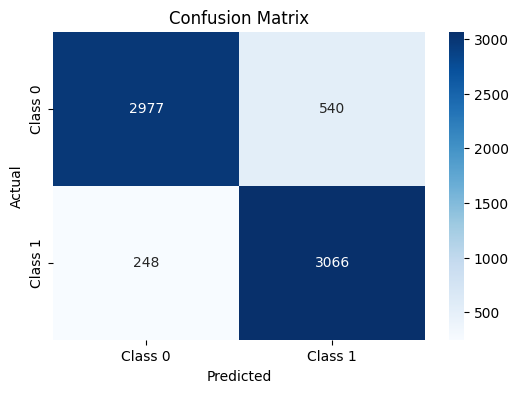

In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['Class 0', 'Class 1']  # Update this list based on your actual class names

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***6*** . **try other Models**

In [77]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_vectorized)

In [78]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=200,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train_vectorized, y_train)
y_pred = rf.predict(X_test_vectorized)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8954765041721563


In [80]:
#from sklearn.model_selection import GridSearchCV

# param_grid = {
#    'n_estimators': [200, 500, 1000],
#    'max_depth': [50, 100, 200],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5]
#}

#grid_search = GridSearchCV(
#    estimator=RandomForestClassifier(random_state=42),
#    param_grid=param_grid,
#    cv=5,
#    scoring='accuracy',
#    n_jobs=-1
#)

#grid_search.fit(X_train_vectorized, y_train)

#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best Accuracy: {grid_search.best_score_}")

In [81]:
# Ensure xgboost is installed

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_vectorized, y_train)
y_pred = xgb.predict(X_test_vectorized)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred)}")

XGBoost Accuracy: 0.8846435368174499


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_vectorized, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test_vectorized)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8230127360562143

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      3517
           1       0.76      0.93      0.84      3314

    accuracy                           0.82      6831
   macro avg       0.84      0.83      0.82      6831
weighted avg       0.84      0.82      0.82      6831



In [84]:
#pip install streamlit

In [85]:
import joblib

# Save the model and vectorizer
joblib.dump(classifier, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [86]:
import streamlit as st
import joblib

# Load the model and vectorizer
model = joblib.load('model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# App title
st.title("Fake News Detection App")

# Input text box
user_input = st.text_area("Enter the news headline:")

# Predict button
if st.button("Predict"):
    if user_input.strip():
        # Preprocess and predict
        user_input_vectorized = vectorizer.transform([user_input])
        prediction = model.predict(user_input_vectorized)
        prediction_label = "Real News" if prediction[0] == 1 else "Fake News"
        st.success(f"Prediction: {prediction_label}")
    else:
        st.error("Please enter a news headline.")
0

2025-01-21 16:49:33.907 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.022 
  command:

    streamlit run c:\Users\ggsan\miniconda3\envs\IronHack\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-21 16:49:34.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 16:49:34.025 Session 

0